---
title: Modelos de dados
order: 311
execute:
    enabled: true
---


In [1]:
# | echo: false

# sobe o diretório se executado como notebook
import os
if os.environ.get("QUARTO_PROJECT_ROOT") is None:
    os.chdir(os.path.join(os.getcwd(), ".."))

## Correlação entre dados

Quantificar o relacionamento entre diferentes medidas nos permite usar uma medida para prever outras.
Por exemplo, há uma relação entre o tamanho da nadadeira de um pinguim e o seu peso?
Podemos encontrar uma resposta a essa pergunta por meio do *dataset* [palmerpenguins](https://allisonhorst.github.io/palmerpenguins).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dados/penguins_size.csv")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# tipos e dados ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# valores nulos
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
# estatísticas descritivas
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Você consegue perceber alguma relação entre o tamanho da nadadeira e o peso dos pinguins?

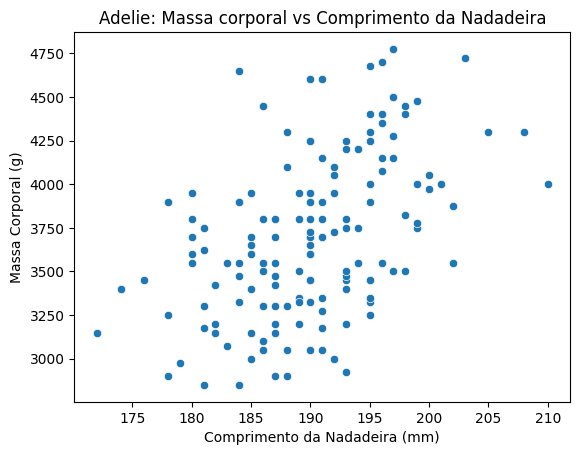

In [ ]:
# filtrar apenas pinguins adelie
adelie = df[df["species"] == "Adelie"]

# scatter plot: massa corporal vs comprimento da nadadeira
sns.scatterplot(data=adelie, x="flipper_length_mm", y="body_mass_g")
plt.title("Adelie: Massa corporal vs Comprimento da Nadadeira")
plt.xlabel("Comprimento da Nadadeira (mm)")
plt.ylabel("Massa Corporal (g)")
plt.show()

Também podemos relacionar a profundidade do bico com o peso.

<!-- mostrar imagem em dados/culmen_depth.png -->
![Profundidade do bico](../dados/culmen_depth.png)

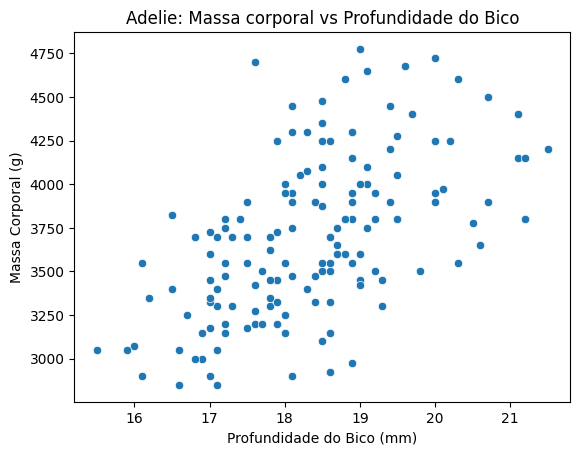

In [9]:
# scatter plot: massa corporal vs comprimento do bico
sns.scatterplot(data=adelie, x="culmen_depth_mm", y="body_mass_g")
plt.title("Adelie: Massa corporal vs Profundidade do Bico")
plt.xlabel("Profundidade do Bico (mm)")
plt.ylabel("Massa Corporal (g)")
plt.show()

Qual das duas características tem uma relação mais forte com o peso?

Não é muito simples de responder só observando os gráficos, mas podemos calcular a correlação para quantificar essa relação.

Correlação entre as variáveis:
                   flipper_length_mm  culmen_depth_mm  body_mass_g
flipper_length_mm           1.000000         0.307620     0.468202
culmen_depth_mm             0.307620         1.000000     0.576138
body_mass_g                 0.468202         0.576138     1.000000


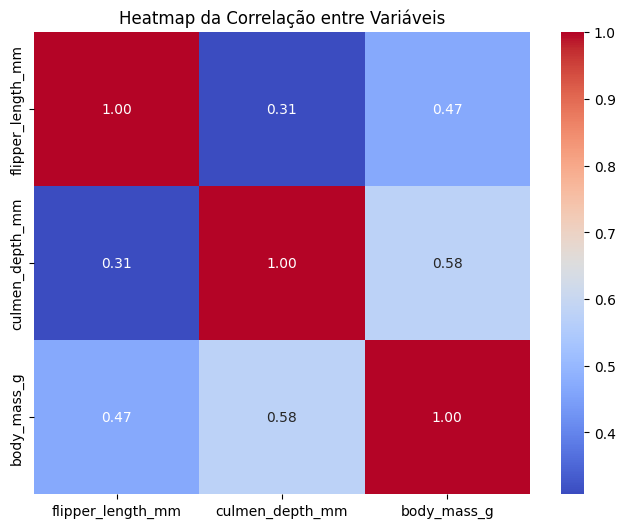

In [10]:
# cálculo da correlação entre as variáveis
correlation = adelie[["flipper_length_mm", "culmen_depth_mm", "body_mass_g"]].corr()
print("Correlação entre as variáveis:")
print(correlation)

# heatmap da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap da Correlação entre Variáveis")
plt.show()

Basicamente, quanto mais próximo de 1 ou -1, mais forte é a relação entre as duas medidas e mais parecido com uma linha é o gráfico de dispersão.

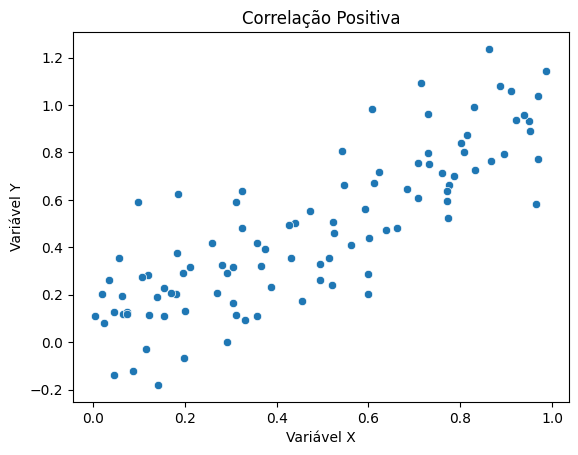

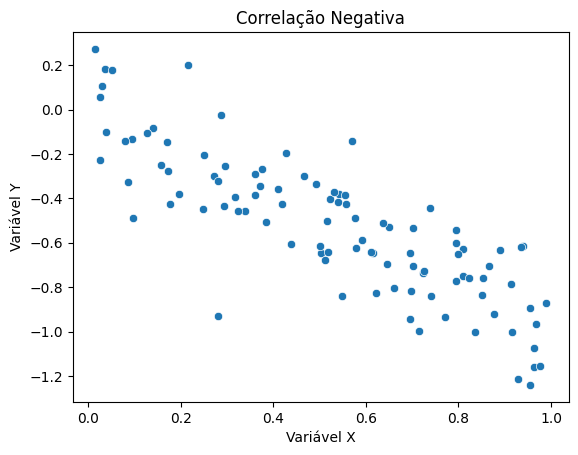

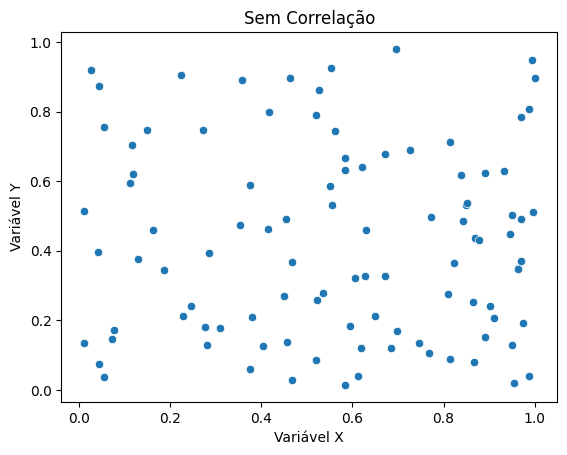

In [12]:
# exemplos de scatter plots com seaborn mostrando correlações diferentes com dados simulados

# correlação positiva
import numpy as np
np.random.seed(42)
x_pos = np.random.rand(100)
y_pos = x_pos + np.random.normal(0, 0.2, 100)
sns.scatterplot(x=x_pos, y=y_pos)
plt.title("Correlação Positiva")
plt.xlabel("Variável X")
plt.ylabel("Variável Y")
plt.show()

# correlação negativa
x_neg = np.random.rand(100)
y_neg = -x_neg + np.random.normal(0, 0.2, 100)
sns.scatterplot(x=x_neg, y=y_neg)
plt.title("Correlação Negativa")
plt.xlabel("Variável X")
plt.ylabel("Variável Y")
plt.show()

# sem correlação
x_no_corr = np.random.rand(100)
y_no_corr = np.random.rand(100)
sns.scatterplot(x=x_no_corr, y=y_no_corr)
plt.title("Sem Correlação")
plt.xlabel("Variável X")
plt.ylabel("Variável Y")
plt.show()

E o relacionamento das variáveis para as outras espécies de pinguins?

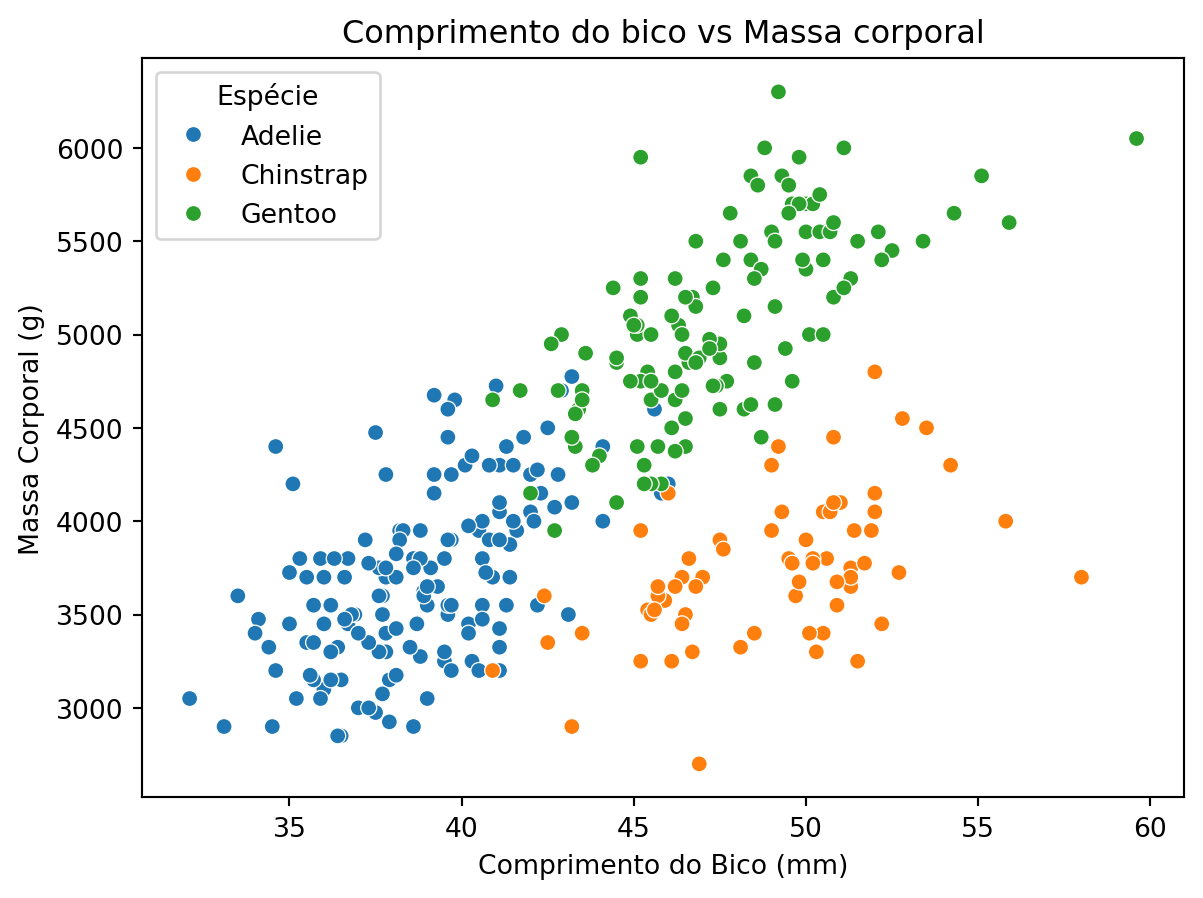

In [6]:
# relação entre massa corporal e comprimento do bico
sns.scatterplot(data=df, x="culmen_length_mm", y="body_mass_g", hue="species")
plt.title("Comprimento do bico vs Massa corporal")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Massa Corporal (g)")
plt.legend(title="Espécie")
plt.show()

## Regressão linear

Vamos prever a massa corporal dos pinguins com base no comprimento do bico.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# remover valores nulos
df_reg = df[["culmen_length_mm", "body_mass_g", "species"]].dropna()

# variáveis independentes e dependentes
X = df_reg[["culmen_length_mm"]]
y = df_reg["body_mass_g"]

# separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliação do modelo
r2 = model.score(X_test, y_test)
print(f"Coeficiente de determinação R²: {r2:.2f}")
print(f"Coeficiente angular: {model.coef_[0]:.2f}, Intercepto: {model.intercept_:.2f}")

Coeficiente de determinação R²: 0.37
Coeficiente angular: 85.06, Intercepto: 473.40


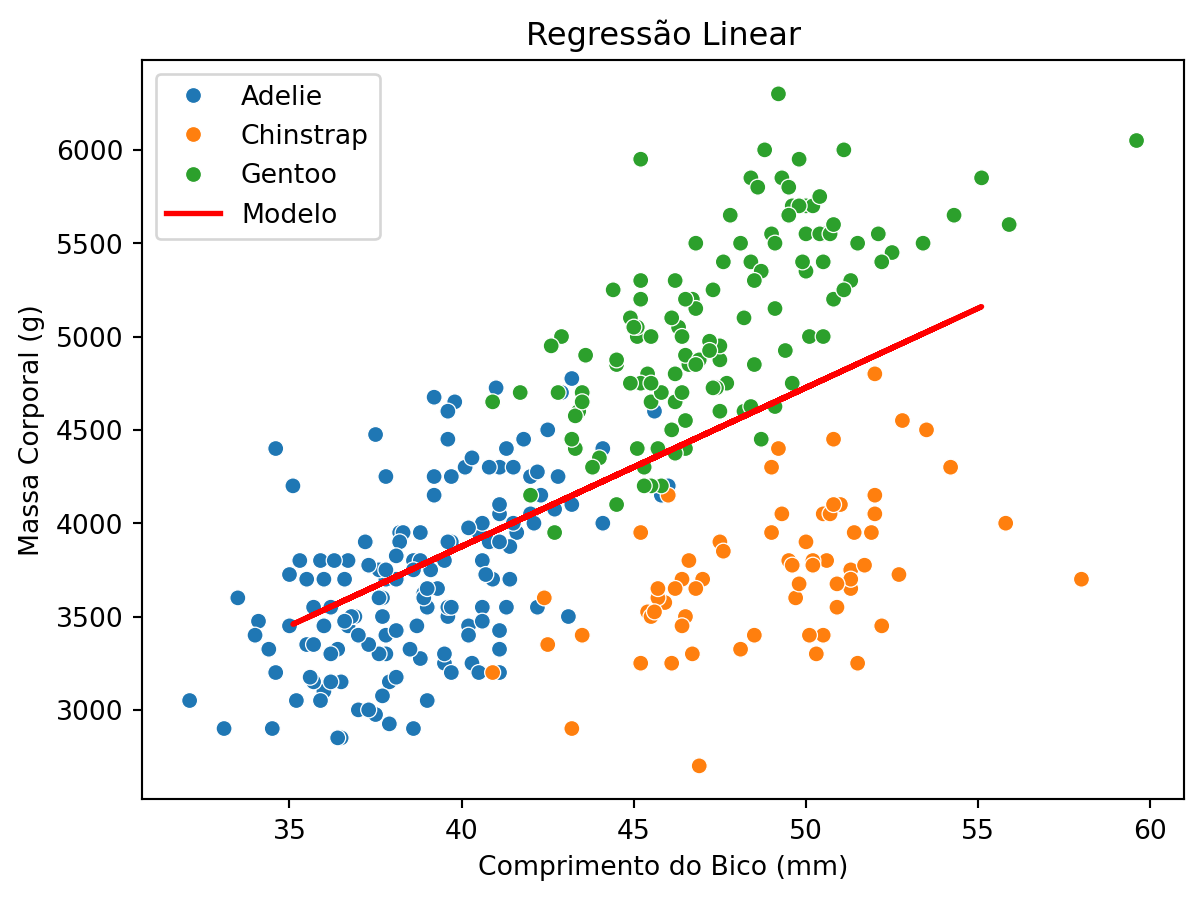

In [8]:
# previsão
y_pred = model.predict(X_test)

# gráfico
sns.scatterplot(data=df_reg, x="culmen_length_mm", y="body_mass_g", hue="species")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Modelo")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Massa Corporal (g)")
plt.title("Regressão Linear")
plt.legend()
plt.show()

## Classificação linear

Agora, vamos prever a espécie do pinguim com base em duas características físicas.

              precision    recall  f1-score   support

      Adelie       0.95      0.93      0.94        44
   Chinstrap       0.85      0.85      0.85        13
      Gentoo       0.97      1.00      0.98        29

    accuracy                           0.94        86
   macro avg       0.92      0.93      0.92        86
weighted avg       0.94      0.94      0.94        86



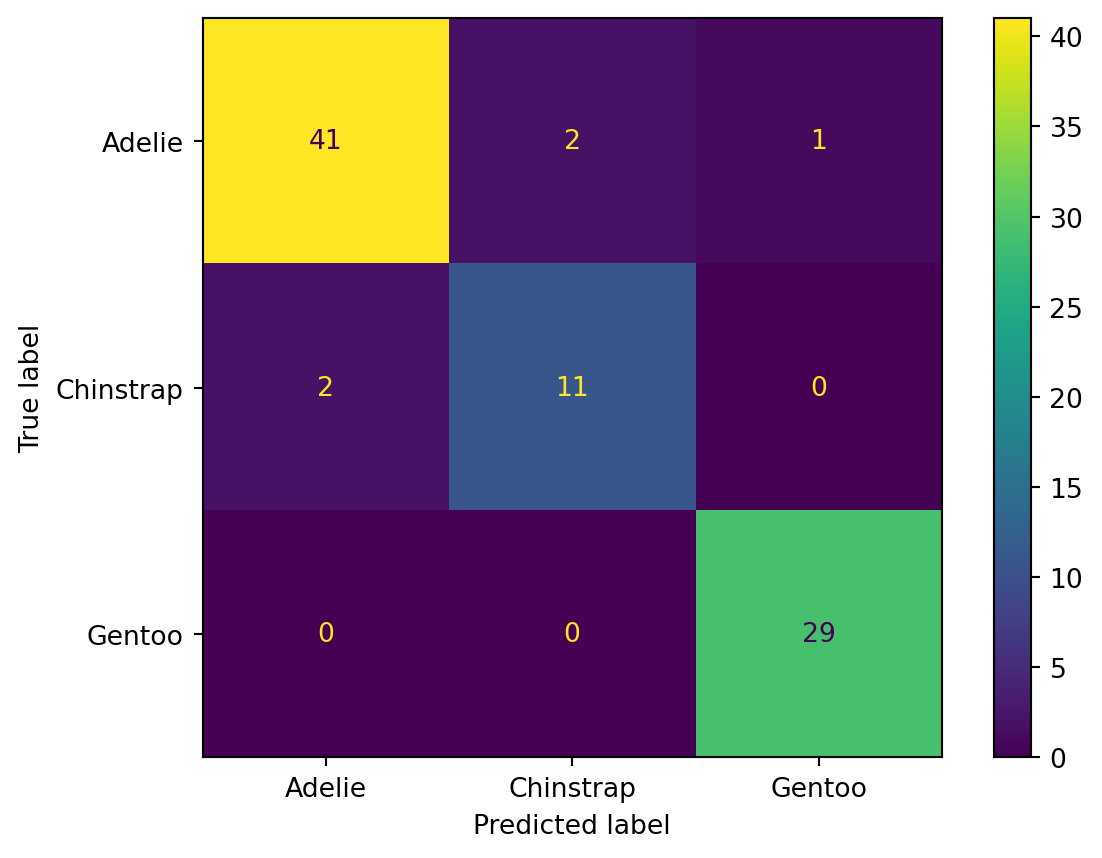

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# selecionar dados
df_clf = df[["culmen_length_mm", "flipper_length_mm", "species"]].dropna()

X = df_clf[["culmen_length_mm", "flipper_length_mm"]]
y = df_clf["species"]

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separar conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# treinar o modelo de classificação
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()